# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [5]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import math

In [6]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

ModuleNotFoundError: No module named 'tensorflow'

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape

In [ ]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

Afficher aléatoirement quelques données de notre base

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de conusion

In [98]:
MT = np.zeros((10,10), dtype=int)
print("/*********************MT vide*************************/")
print(MT)
def MTC(MT, y_predit, y_reel):
    for i in range(len(y_predit)):
        if y_predit[i]==y_reel[i]:
            MT[y_predit[i],y_predit[i]]=MT[y_predit[i],y_predit[i]]+1
        else:
            MT[y_reel[i],y_predit[i]]=MT[y_reel[i],y_predit[i]]+1
# Y_test=Y_test.tolist()
for i in range(len(Y_test)):
    if Y_test[i]==10:
        Y_test[i]=0
MTC(MT,y_pred,Y_test)
print("/*********************MT plein*************************/")
print(MT)
print(Y_predit)
print("/*********************************************************************/")
print(Y_test)

def MTC_ck(MT,k):
    MTk = np.zeros((2,2), dtype=int)
    fp=0
    fn=0
    vn=0
    for i in range(10):
        if i!=(k):
            fp=fp+MT[k,i]
            fn=fn+MT[i,k]
        for j in range(10):
            if i!=(k) and j!=(k):
                vn=vn+MT[i,j]
    MTk[0,0]=MT[k-1,k-1]
    MTk[1,0]=fp
    MTk[0,1]=fn
    MTk[1,1]=vn
    return MTk
def Tous_MTK(MT):
    All_mtc=[]
    for i in range(10):
        All_mtc.append(MTC_ck(MT,i))
#     print("ALL_MT",All_mtc)
    return All_mtc
Tous_MTK(MT)
def total():
    a=Tous_MTK(MT)
    s=0
    for i in a:
        s=s+Rappel(i)
    s=s/10
    print("Le rappel=",s)
    s=0
    for i in a:
        s=s+T_FP(i)
    s=s/10
    print("Le Taux de FP=",s)
    s=0
    for i in a:
        s=s+Accuracy(i)
    s=s/10
    print("La specifite=",s)
    s=0
    for i in a:
        s=s+Precision(i)
    s=s/10
    print("La precision=",s)
total()
        
        

/*********************MT vide*************************/
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
/*********************MT plein*************************/
[[150   1   3   2   2   4   1   0   3   1]
 [  2 153   3   2   1   0   1   7   5   2]
 [  2   4 120   9   3   3   4   5   6   1]
 [  1   1   4 116   3  14   1   3  12  10]
 [  3   1   2   4 136   2   7   3   5   8]
 [  6   2   6  13   2 117   0   2   9   8]
 [  4   1   8   1   5   6 143   2   6   3]
 [  0   2   2   7   0   2   0 131   2  17]
 [  7   5   7   9   7   5   5   4  85   5]
 [  3   2   4   6   5   4   1   7   7 146]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

- Rappel


In [7]:
def Rappel(MTk):
    Rappel=MTk[0,0]/(MTk[0,0]+MTk[0,1])
    return Rappel

- Précision

In [8]:
def Precision(MTk):
    tfp=MTk[0,0]/(MTk[0,0]+MTk[1,0])
    return tfp


- Taux de FP

In [9]:
def T_FP(MTk):
    tfp=MTk[1,0]/(MTk[1,0]+MTk[1,1])
    return tfp

- Spécificité

In [10]:
def Accuracy(MTk):
    acc=MTk[1,1]/(MTk[1,0]+MTk[1,1])
#     acc=1-T_FP(MTk)
    return acc


# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [62]:
tRatio=2/3
ttRatio=1/3
X_test=X
Y_test=Y
t=int(5000*tRatio)
X_train=np.zeros((t,400), dtype=int)
Y_train=np.zeros((t), dtype=int)
for i in range(t):
    c = random.randint(X_test.shape[0])
#     print(c)
    a=X_test[c,:]
    b=Y_test[c]
    Y_test=np.delete(Y_test, c, 0)
    X_test=np.delete(X_test, c, 0)
    Y_train[i]=b
    for k in range(400):
#         print("Hello")
        X_train[i,k]=a[k]
print("/***************************************** train entree *************************************/")
print(X_train)
print("/***************************************** test entree *************************************/")
print(X_test)
print("/***************************************** test sortie *************************************/")
print(Y_test)
print("/***************************************** train sortie *************************************/")
print(Y_train)
print("/***************************************** shape train sortie *************************************/")
print(Y_train.shape)
print("/***************************************** shape test sortie *************************************/")
print(Y_test.shape)
print("/***************************************** shape test entree *************************************/")
print(X_test.shape)
print("/***************************************** shape test entree *************************************/")
print(X_train.shape)


/***************************************** train entree *************************************/
[[13 13 13 ... 13 13 13]
 [21 21 21 ... 21 21 21]
 [10 10 10 ... 10 10 10]
 ...
 [11 11 11 ... 11 11 11]
 [23 23 23 ... 23 23 23]
 [ 9  9  9 ...  9  9  9]]
/***************************************** test entree *************************************/
[[14 14 14 ... 14 14 14]
 [ 9  9  9 ...  9  9  9]
 [10 10 10 ... 10 10 10]
 ...
 [11 11 11 ... 11 11 11]
 [12 12 12 ... 12 12 12]
 [13 13 13 ... 13 13 13]]
/***************************************** test sortie *************************************/
[10 10 10 ...  9  9  9]
/***************************************** train sortie *************************************/
[2 5 3 ... 2 6 9]
/***************************************** shape train sortie *************************************/
(3333,)
/***************************************** shape test sortie *************************************/
(1667,)
/***************************************** shape te

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [9]:
# def KPP(x,X, Y):
    # Il faudra retourner l'etiquette de x, en le comparant à toutes les données de Xt, Yt
# distances=[]
####################################################################################################################
def distances(x,X):
    dis=[]
    for j in X:
        distance=0
        for k in range(400):
            distance=distance+(x[k]-j[k])**2
        distance=math.sqrt(distance)
        dis.append(distance)
#     print(dis)
#     dis.sort()
    return dis
######################################################################################################################3
dis=[]
Y_predit=[]
def KPP(x,X, Y,k):
    Y2=[]
    e=-1
    for i in x:
        p=np.zeros((10), dtype=int)
        e=e+1
        dis=distances(i,X)
        indexe=np.argsort(dis)
        for l in range(k):
#             print(indexe[l])
#             print("here",Y[indexe[l]])
            p[(Y[indexe[l]]%10)]=p[(Y[indexe[l]]%10)]+1
#             print(p)
        Y2.append(p.tolist().index(max(p)))
        print(e)
    print(Y2)
    return Y2
Y_predit=KPP(X_test,X_train,Y_train,3)

            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Méthode 1: MVS
Machine à Vecteurs de Support

In [90]:
#Créer le modèle
model= svm.SVC(kernel='linear') 
# entrainement 
model.fit(X_train, Y_train)
# Prediction
y_pred = model.predict(X_test)
file = open("Y_test.txt","w")
for i in y_pred:
    if i==10:
        i=0
        k=k+1
    i=str(i)+", "
    file.write(i)
for i in range(len(Y_test)):
    if Y_test[i]==10:
        Y_test[i]=0
for i in range(len(y_pred)):
    if y_pred[i]==10:
        y_pred[i]=0
print(y_pred.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

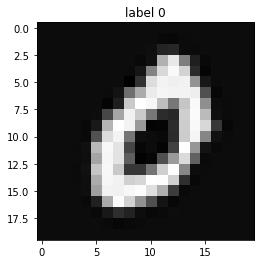

In [41]:
# tester une image
c= 3
y_pred[c]
a = X_test[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Y_test[c]))
plt.imshow(a,cmap='gray')

# Méthode 2: Arbres de décision


In [94]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(X_train, Y_train)
# Prediction
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i]==10:
        y_pred[i]=0
print(y_pred.tolist())

[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 4, 0, 0, 0, 5, 2, 8, 0, 0, 0, 0, 0, 0, 0, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 9, 4, 1, 1, 7, 1, 1, 0, 8, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 0, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 

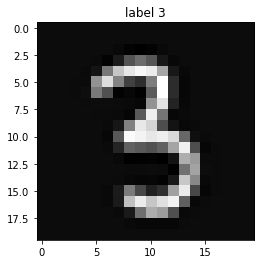

In [54]:
# tester une image
c= 501
y_pred[c]
a = X_test[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Y_test[c]))
plt.imshow(a,cmap='gray')

# Méthode 3: RN 
Réseaux de neurones Perceptron

In [104]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=25, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
# Choisir un image de test 
c=0

In [99]:
y_pred=model.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i]==10:
        y_pred[i]=0
print(y_pred.tolist())

[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 4, 0, 0, 0, 5, 2, 8, 0, 0, 0, 0, 0, 0, 0, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 9, 4, 1, 1, 7, 1, 1, 0, 8, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 0, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 

In [96]:
# pour ROC, il faudra les probabilités:
yp=model.predict_proba(X_test)
print(yp)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Afficher l'image testée

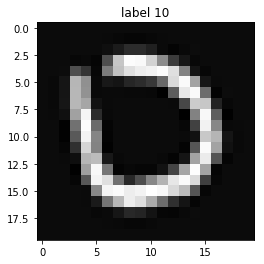

In [87]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [121]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [ ]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 4 Mars 2022 à 22h

La partie RNC peut être laissée pour le prochain TP

In [ ]:
# bonne chance